# Boston Houses Prices Prediction.

**1- Loading the dataset and first look at the data**

**2- Cleaning the data**

**3- Visuallizing the data and see impotant features**

**4- Preproccessing the data for the modeling**

**5- Loading the model and make the prediction**

**6- Evaluating the model**


# 1- Loading the dataset and first look at the data :-

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset and set headers
df = pd.read_csv('DATA/housing.csv' , header=None , delim_whitespace=True) 

# display the first few rows of the dataset
print(df.head())


# information about the dataset
print('\n dataset info :' , df.info())

# statistical summary of the dataset
print('\n dataset description :' ,  df.describe())

C:\Users\WAFACo\AppData\Local\Temp\ipykernel_7060\119120213.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('DATA/housing.csv' , header=None , delim_whitespace=True)


        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6  

In [458]:
# Add the real name of the columns

df.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 

# display the first few rows of the dataset with updated column names
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


**Now we can work with the data set**

but for instance:

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

CRIM: Per capita crime rate by town

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

B: 1000(Bk - 0.63)^2 where Bk is Black population proportion

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

# 2- Cleaning the data :-

In [459]:
#looking for missing values
df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [460]:
#looking for duplicated values
df.duplicated().sum()

np.int64(0)

**the data is clean**

# 3- Visuallizing the data and see impotant features :-

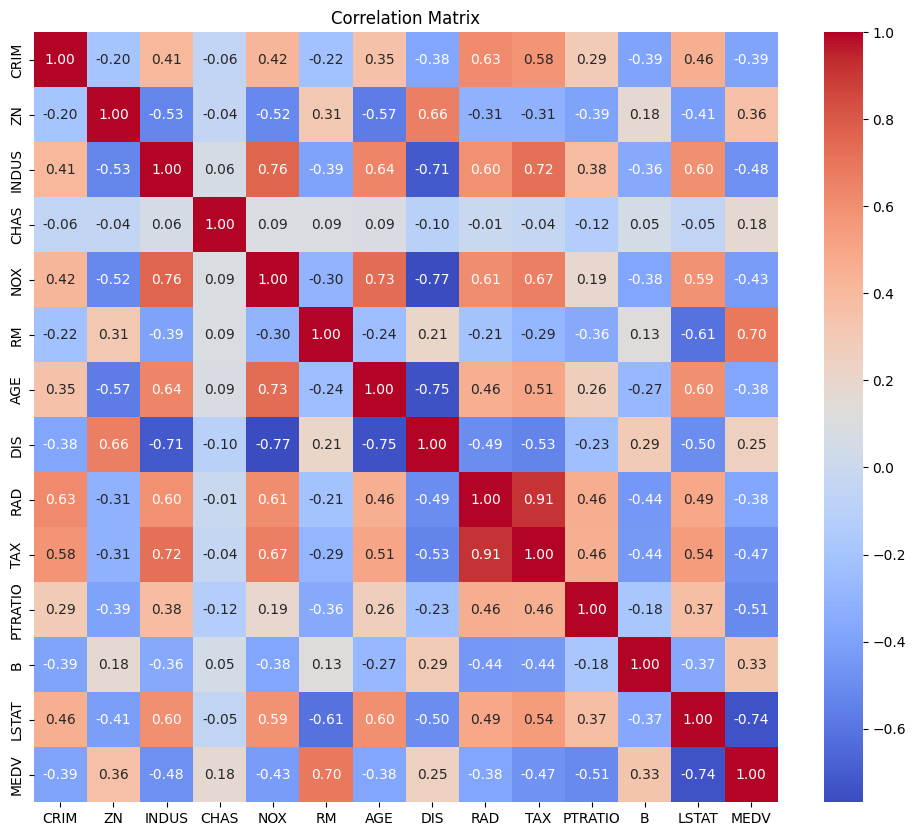

In [461]:
# coorrelation matrix

plt.figure(figsize=(12 , 10))
sns.heatmap(df.corr() , annot=True , cmap='coolwarm' , fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**from this we see that there is a high correlation between RAD and TAX so we must drop one of them beacause we will use linear regression**

In [462]:
# droping RAD beacuse it has a weaker relationship with the target MEDV 
new_df= df.drop('RAD' , axis=1)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 4- Preproccessing the data for the modeling :-

In [463]:
#importing libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.pipeline import Pipeline

# Splitting the dataset into features and target variable
X = new_df.drop('MEDV', axis=1)
y = new_df['MEDV']

preprocessing_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # Polynomial features for non-linear relationships
    ('scaler', StandardScaler()) # Standardizing the features
])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

# 5- Loading the model and make the prediction :-

In [464]:
# importing libraries for model and evaluation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Creating a linear regression model
model =Pipeline([
    ('preprocessing', preprocessing_pipeline) # for preprocessing the input data in app 
    , ('lasso', LassoCV(cv=5, random_state=42))
    ])

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

e:\yamen apps\phyton\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.374e+00, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent_gram(
e:\yamen apps\phyton\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.480e+00, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent_gram(
e:\yamen apps\phyton\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.938e+00, tolerance:

# 6- Evaluating the model :-

In [465]:
# Displaying the coefficients of the model
model_coefficients = model.named_steps['lasso'].coef_
print("Model Coefficients:", model_coefficients)


# Evaluating the model 
print("\nModel Evaluation :")  
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Model Coefficients: [-0.         -0.          0.          0.62398232  0.          0.
  0.         -3.06239431  0.23170196  0.          0.         -0.
 -0.          0.01444519 -0.          2.27718209 -0.815685   -0.
 -0.         -0.         -0.         -0.         -0.08446961 -0.
  0.         -0.23741448  0.         -0.          0.         -0.
 -0.          0.          0.49860392 -0.         -0.37287068  0.
  0.          0.         -0.          0.85855349 -0.24120152  2.25063612
 -0.          0.         -2.66904156  0.15306275 -1.28943526 -0.70654659
  0.          0.         -1.81780205  0.          2.11414949 -0.33750662
  0.         -1.21332892 -0.         -0.09688048  0.         -0.
  0.         -0.          9.29076221 -0.72263445 -0.         -7.9706462
 -3.03103304  0.21185808 -1.56078985  0.         -0.          0.46542518
 -0.         -0.         -1.51658228  1.18141735 -0.          0.
 -0.          0.          3.84687764  5.54195464  0.44755453 -6.39654443
  0.          0.2253956

# saving the model for deplyment :-

In [466]:
import joblib

joblib.dump(model, 'Price_model.pkl')

['Price_model.pkl']